# Skin segmentation

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import make_scorer, confusion_matrix

In [79]:
# Creating the function that returns the percentage of each class in the dataset 

def imbalance(elements):
    percent=[]
    sum_of_elements=np.sum(elements)
    for i in range(len(elements)):
        percent.append((elements[i]/sum_of_elements)*100)
    return percent

In [81]:
# Function to create imbalanced dataset, imb_percent represents the imbalance in decimals.

def create_imbalanced_data_for_stars(imb_percent, size_of_one_class):
    size = int(size_of_one_class/imb_percent)
    data_0 = data.query("Skin==1").sample(size-size_of_one_class)
    data_1 = data.query("Skin==2")
    return pd.concat([data_0, data_1])

Reading the dataset from the txt file and adding the column names

In [89]:
# reading the data and adding column names to the dataframe and displaying the data 

data=pd.read_table('Skin_NonSkin.txt', delimiter = '\t')
data.columns =['B', 'G', 'R', 'Skin']
data.head()

,B,G,R,Skin
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [83]:
# displaying the type of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245056 entries, 0 to 245055
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       245056 non-null  int64
 1   G       245056 non-null  int64
 2   R       245056 non-null  int64
 3   Skin    245056 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [84]:
# 1 represents skin sample and 2 nonskin sample
data['Skin'].value_counts()

2    194198
1     50858
Name: Skin, dtype: int64

In [90]:
# Getting the current imbalance in the dataset

print(imbalance([data["Skin"].value_counts()[1], data["Skin"].value_counts()[2]]))

[20.753623661530426, 79.24637633846957]


In [91]:
# randomly dropping the rows with Skin value 2 to reduce the imbalance

data[data["Skin"]==2]
drop_indices = np.random.choice(data[data["Skin"]==2].index, 140000, replace=False)
data = data.drop(drop_indices)
data['Skin'].value_counts()

2    54198
1    50858
Name: Skin, dtype: int64

In [92]:
# checking the imbalance after dropping the rows

print(imbalance([data["Skin"].value_counts()[1], data["Skin"].value_counts()[2]]))

[48.4103716113311, 51.5896283886689]


In [93]:
# check if any null values are present in the data

data.isnull().values.any()

False

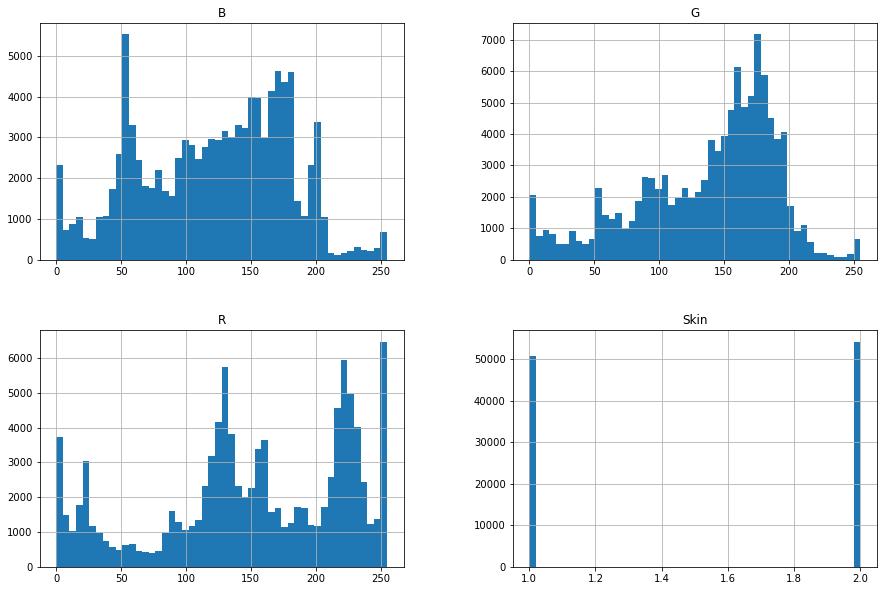

In [94]:
# plotting the histograms on all the columns

_ = data.hist(bins=50, figsize=(15,10))

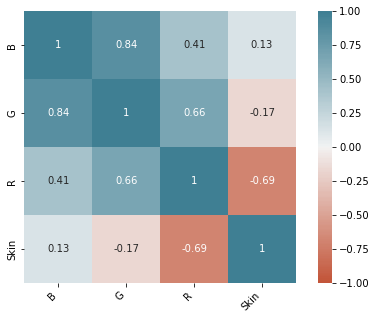

In [95]:
# Plotting the heat map for the columns

plt.figure(figsize = (8,5))
ax = sn.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Skin_NonSkin dataset with low imbalance

In [96]:
# adding imbalance to the dataset

data_imbalanced_1 = create_imbalanced_data_for_stars(0.65, 54000)
print(imbalance([data_imbalanced_1["Skin"].value_counts()[1], data_imbalanced_1["Skin"].value_counts()[2]]))
data_imbalanced_1["Skin"].value_counts()

[34.91606023488724, 65.08393976511276]


2    54198
1    29076
Name: Skin, dtype: int64

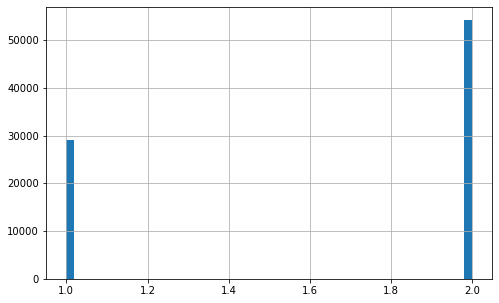

In [97]:
_ = data_imbalanced_1["Skin"].hist(bins=50, figsize=(8,5))

## Skin_NonSkin dataset with medium imbalance

In [98]:
# adding 75percent imbalance

data_imbalanced_2 = create_imbalanced_data_for_stars(0.75, 54000)
print(imbalance([data_imbalanced_2["Skin"].value_counts()[1], data_imbalanced_2["Skin"].value_counts()[2]]))
data_imbalanced_2["Skin"].value_counts()

[24.93143854400399, 75.068561455996]


2    54198
1    18000
Name: Skin, dtype: int64

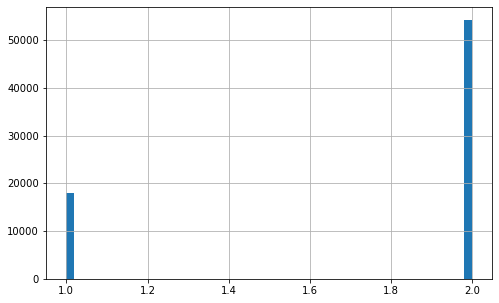

In [99]:
_ = data_imbalanced_2["Skin"].hist(bins=50, figsize=(8,5))

## Skin_NonSkin dataset with high imbalance

In [100]:
# adding high imbalance to the dataset

data_imbalanced_3 = create_imbalanced_data_for_stars(0.9, 54000)
print(imbalance([data_imbalanced_3["Skin"].value_counts()[1], data_imbalanced_3["Skin"].value_counts()[2]]))
data_imbalanced_3["Skin"].value_counts()

[9.96710854181202, 90.03289145818798]


2    54198
1     6000
Name: Skin, dtype: int64

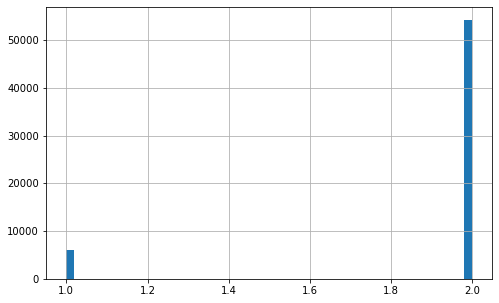

In [101]:
_ = data_imbalanced_3["Skin"].hist(bins=50, figsize=(8,5))